In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = r'C:\Users\lenovo\09-2024 CareerFoundry'
cust = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', "ords.csv"))
cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income
0,2293453,19,2,5,14,6,-60,3,0,Soda,...,Frequent customer,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988
1,1973799,19,5,6,12,8,-60,15,1,Soda,...,Frequent customer,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988
2,532817,19,7,4,17,6,-60,1,1,Soda,...,Frequent customer,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988
3,2474845,19,6,5,13,20,72,5,0,Oats & Honey Gluten Free Granola,...,Frequent customer,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988
4,86918,19,9,5,16,8,-85,16,0,Granny Smith Apples,...,Frequent customer,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988


Q. Follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

[Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday')]

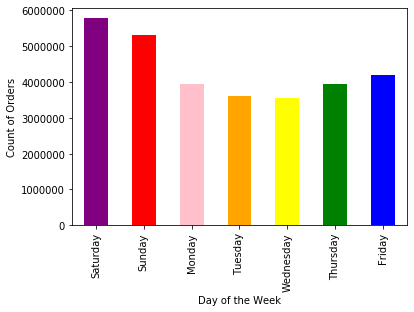

In [25]:
#bar chart for number of orders by days of a week
bar = cust['orders_day_of_week'].value_counts().sort_index(inplace=False).plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
bar.set_xlabel('Day of the Week')
bar.set_ylabel('Count of Orders')
bar.set_xticklabels( ('Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday') )

In [4]:
#exporting the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

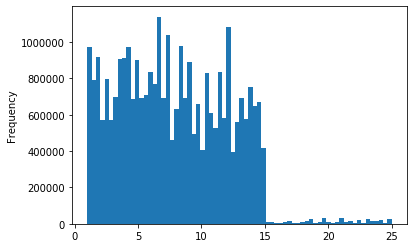

In [5]:
#histogram for prices binned into 70 bins
hist = cust['prices'].plot.hist(bins=70)

In [6]:
#saving the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [3]:
#sampling the datatframe
df = cust.loc[:200000,['orders_day_of_week','prices']]

[Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday')]

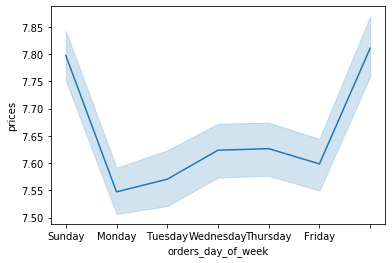

In [8]:
line = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')
line.set_xticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

In [5]:
#saving the line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

Q. Create a histogram of the “order_hour_of_day” column

[Text(0, 0, '0'),
 Text(0, 0, '500K'),
 Text(0, 0, '1000K'),
 Text(0, 0, '1500K'),
 Text(0, 0, '2000K'),
 Text(0, 0, '2500K')]

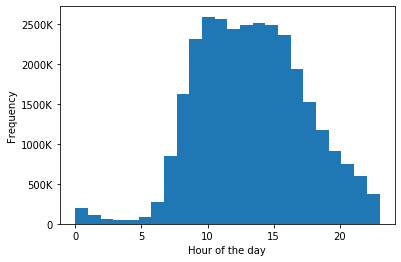

In [26]:
hist_2 = cust['order_hour_of_day'].plot.hist(bins=24)
hist_2.set_xlabel('Hour of the day')
hist_2.set_yticklabels( ('0', '500K','1000K','1500K','2000K','2500K') )

Since there are 24 hours in a day, the number of bins has been defined as 24. We can see the number of orders received during very early and during late hours is less than the peak, which is between the hours 10 AM and 4 PM

In [7]:
#saving the histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

Q. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0, 0.5, 'Count of Customers (in 10,000K)')

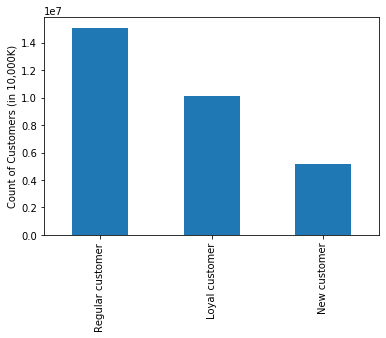

In [27]:
bar = cust['loyalty_flag'].value_counts().plot.bar()
bar.set_ylabel('Count of Customers (in 10,000K)')

In [9]:
#saving the bar plot
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

Q. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [10]:
np.random.seed(4)
dev = np.random.rand(len(cust)) <= 0.3

In [11]:
samp = cust[dev]

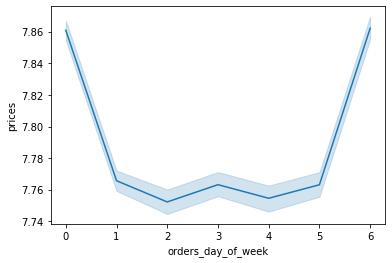

In [12]:
line = sns.lineplot(data = samp, x = 'orders_day_of_week',y = 'prices')

Prices seem to rise during the weekends compared to the weekdays, where the prices are reasonably stable and remain relatively low.

In [13]:
#saving the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices.png'))

Q. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

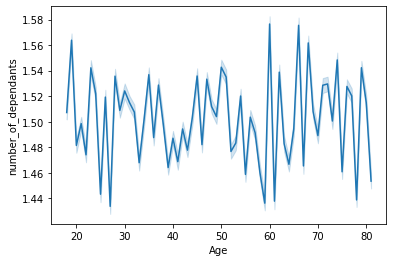

In [14]:
line = sns.lineplot(data = samp, x = 'Age',y = 'number_of_dependants')

There does not seem to be any correlation between age and the number of dependents.

In [15]:
#saving the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

Q. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

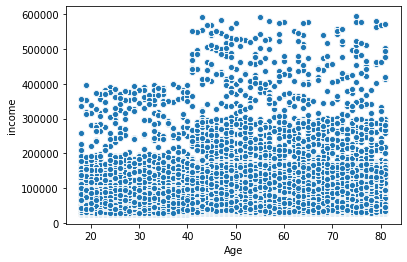

In [3]:
#creating the scatterplot
scatter = sns.scatterplot(x = 'Age', y = 'income',data = cust)

In [17]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

Low income class (less than 200K income) is common among all age groups. People who are aged below 40 seem to have less earning power, with a mazximum of about 400K. There is more variation among older people (above 40), although most people still earn close to 300K, with some earning as high as 600K income.

In [3]:
binned = pd.cut(
    cust['Age'],
    bins=[0, 15, 25, 35, 45, 55, 65,75,85,100],
    labels=["0-15", "16-25", "26-35", "36-45", "46-55", "56-65","66-75","76-85","85+"],
)

In [13]:
cust['Age_Bin'] = binned
cust['Age_Bin'].head
plot1 = cust.groupby('Age_Bin')['income'].mean().fillna(0)

Text(0, 0.5, 'Income')

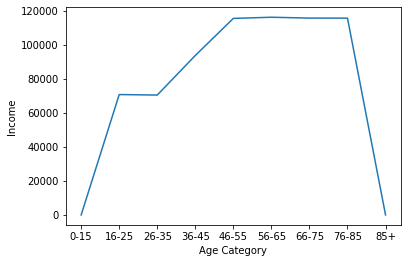

In [19]:
plt.plot(plot1)
plt.xlabel('Age Category')
plt.ylabel('Income')